### Author: Tej Dave
### Date: 07-31-2022

In [285]:
import pandas as pd
import re
import string
import nltk
import emoji

wn = nltk.WordNetLemmatizer()
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading Dataset

In [286]:
dataset = pd.read_csv('SMSSpamCollection.tsv',
                      names=['labels','content'],
                      sep='\t',header = None)

In [287]:
dataset.head()

,labels,content
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [288]:
dataset.shape

(5568, 2)

We have 2 features and 5568 Observation. The data is SMS dataset, with a label SPAM or HAM(Not SPAM). 

In [289]:
dataset.info

<bound method DataFrame.info of      labels                                            content
0       ham  I've been searching for the right words to tha...
1      spam  Free entry in 2 a wkly comp to win FA Cup fina...
2       ham  Nah I don't think he goes to usf, he lives aro...
3       ham  Even my brother is not like to speak with me. ...
4       ham                I HAVE A DATE ON SUNDAY WITH WILL!!
...     ...                                                ...
5563   spam  This is the 2nd time we have tried 2 contact u...
5564    ham               Will ü b going to esplanade fr home?
5565    ham  Pity, * was in mood for that. So...any other s...
5566    ham  The guy did some bitching but I acted like i'd...
5567    ham                         Rofl. Its true to its name

[5568 rows x 2 columns]>

In [290]:
dataset[dataset['content'].duplicated(keep=False)]

,labels,content
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,ham,As per your request 'Melle Melle (Oru Minnamin...
6,spam,WINNER!! As a valued network customer you have...
7,spam,Had your mobile 11 months or more? U R entitle...
9,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5520,spam,You are awarded a SiPix Digital Camera! call 0...
5531,ham,"I know you are thinkin malaria. But relax, chi..."
5535,ham,Just sleeping..and surfing
5549,ham,Hahaha..use your brain dear


We do have duplicates. It is always good idea to drop duplicates

In [291]:
#dataset.drop_duplicates(subset=['content'],keep='first', inplace=True)

In [292]:
dataset.shape

(5568, 2)

### Data Cleaning

In [293]:
def clean_text(text):
    
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
    text = re.sub(r'https?\/\/S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'http\S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'www\S+', '',  str(text)) # remove the www
    text = re.sub(r'twitter+', '',  str(text)) # remove the twiiter
    text = re.sub(r'pic+', '',  str(text)) # remove the pic
    text = re.sub(r'com', '',  str(text)) # remove the pic
    text = re.sub('\n', '',str(text))# remove \n from the text
    text = text.strip()
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    emoji.get_emoji_regexp().sub(u'', text)
    tokens = re.split('\W+', text)
    text = " ".join([wn.lemmatize(word) for word in tokens if word not in stopword])#lemmatization
#     text = [wn.lemmatize(word) for word in tokens if word not in stopword]
    
    
    return text


In [294]:
dataset.head()

,labels,content
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [295]:
dataset['cleaned_content'] = dataset['content'].apply(lambda x: clean_text(x))

C:\Users\admin\AppData\Local\Temp\ipykernel_21176\1425294129.py:15: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  emoji.get_emoji_regexp().sub(u'', text)


In [296]:
dataset.tail()

,labels,content,cleaned_content
5563,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u 750 pound prize 2...
5564,ham,Will ü b going to esplanade fr home?,ü b going esplanade fr home
5565,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestion
5566,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...
5567,ham,Rofl. Its true to its name,rofl true name


### Feature Engineering

In [297]:
dataset['body_len'] = dataset['content'].apply(lambda x: len(x) - x.count(" "))

In [298]:
dataset.head()

,labels,content,cleaned_content,body_len
0,ham,I've been searching for the right words to tha...,ive searching right word thank breather promis...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly p win fa cup final tkts 21st...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though,49
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28


In [299]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [300]:
dataset['punct%'] = dataset['content'].apply(lambda x: count_punct(x))

In [301]:
dataset.head()

,labels,content,cleaned_content,body_len,punct%
0,ham,I've been searching for the right words to tha...,ive searching right word thank breather promis...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly p win fa cup final tkts 21st...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though,49,4.1
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28,7.1


### Ploting Feature Engineering

In [302]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

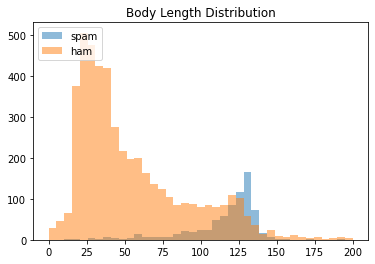

In [303]:
bins = np.linspace(0, 200, 40)

pyplot.title("Body Length Distribution")
pyplot.hist(dataset[dataset['labels']=='spam']['body_len'], bins, alpha=0.5, label='spam')
pyplot.hist(dataset[dataset['labels']=='ham']['body_len'], bins, alpha=0.5,  label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

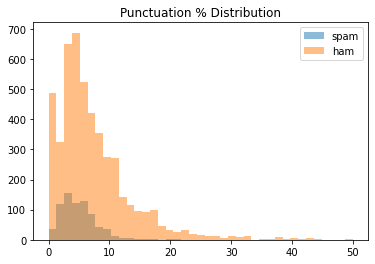

In [304]:
bins = np.linspace(0, 50, 40)

pyplot.hist(dataset[dataset['labels']=='spam']['punct%'], bins, alpha=0.5, label='spam')
pyplot.hist(dataset[dataset['labels']=='ham']['punct%'], bins, alpha=0.5,  label='ham')
pyplot.title("Punctuation % Distribution")
pyplot.legend(loc='upper right')
pyplot.show()

In [305]:
dataset.head()

,labels,content,cleaned_content,body_len,punct%
0,ham,I've been searching for the right words to tha...,ive searching right word thank breather promis...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly p win fa cup final tkts 21st...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though,49,4.1
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28,7.1


### Vectorization (TF-IDF)

In [306]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [307]:
# tfidf_vect = TfidfVectorizer(analyzer=clean_text)
# X_tfidf = tfidf_vect.fit_transform(dataset['cleaned_content'])
# X_tfidf_df = pd.DataFrame(X_tfidf.toarray())

# X_features = pd.concat([dataset['body_len'], dataset['punct%'], ], axis=1)
# X_features.head()

Building Model: Random Forest with houldout testset

In [308]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [309]:
X_train, X_test, y_train, y_test = train_test_split(dataset[['cleaned_content']], dataset['labels'], test_size=0.2)

In [310]:
X_train

,cleaned_content
4897,ou guaranteed latest nokia phone 40gb ipod mp3...
104,would ip address test considering puter isnt m...
197,sent ltgt buck
2275,hmmbad newshype park plaza 700 studio takenonl...
186,jus reached home go bathe first si using net t...
...,...
1464,wont touch permission
1260,ok wahala remember friend need
1849,2nd time tried 2 contact u u 750 pound prize 2...
2709,hey still want go yogasana coz end cine go bat...


In [311]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)

X_tfidf_fit = tfidf_vect.fit(X_train['cleaned_content'])

tfidf_train = X_tfidf_fit.fit_transform(X_train['cleaned_content'])

tfidf_test = X_tfidf_fit.transform(X_test['cleaned_content'])

C:\Users\admin\AppData\Local\Temp\ipykernel_21176\1425294129.py:15: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  emoji.get_emoji_regexp().sub(u'', text)


In [312]:
X_test_vect = pd.DataFrame(tfidf_test.toarray())

X_train_vect = pd.DataFrame(tfidf_train.toarray())

In [313]:
X_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.431055,0.304811,0.226656,0.000000,0.249815,0.078121,0.403078,0.0,0.000000,0.156623,...,0.072576,0.052073,0.081471,0.068193,0.037837,0.091340,0.0,0.0,0.0,0.0
1,0.401911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.143798,0.103174,0.080711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.346749,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.248123,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.405852,0.542091,0.000000,0.125682,0.000000,0.000000,0.000000,0.0,0.155175,0.000000,...,0.064537,0.000000,0.072446,0.000000,0.134583,0.162444,0.0,0.0,0.0,0.0
4,0.595987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.213235,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


### Creating RandomForest Model

In [314]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train_vect, y_train)

In [315]:
y_pred = rf_model.predict(X_test_vect)

In [316]:
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

### Evalution of Model

In [317]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.977 / Recall: 0.875 / Accuracy: 0.981


### Phase 2: Tweet classification using Randomforest Model

In [318]:
import pandas as pd
import twint
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import sys
import numpy as np
import os
import string
import seaborn as sns

In [319]:
import nest_asyncio
nest_asyncio.apply()


* [Only uncomment when you want new tweet]

In [320]:
#Twint fetching tweets with the keyword "trump" and storing them in a CSV file



# c=twint.Config() 
# c.Search = "ukrainerussiawar, ukraine,russia,war" 
# c.TwitterSearch 
# c.Limit= 25000 
# c.Store_csv=True 
# c.Pandas = True 
# c.Output = "tweet.csv" 
# c.Lang = "en" 
# twint.run.Search(c)

In [321]:
#Reading the CSV file and placing it into pandas dataframe

tweet_df=pd.read_csv("ukraine_russia_war_tweet.csv")# change the name if csv here.

#viewing columns to see which are neccessary and which are not
tweet_df.columns

C:\Users\admin\AppData\Local\Temp\ipykernel_21176\1330601870.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  tweet_df=pd.read_csv("ukraine_russia_war_tweet.csv")# change the name if csv here.


Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [322]:
columns_list = ['conversation_id', 'created_at', 'timezone',
       'user_id', 'username', 'name', 'place','mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest','language' ]
tweet_df.drop(columns_list, axis = 1, inplace= True)

In [323]:
#viewing columns to see which are neccessary and which are not
tweet_df.columns

Index(['id', 'date', 'time', 'tweet'], dtype='object')

In [324]:
tweet_df.head()

,id,date,time,tweet
0,1553781661359292418,2022-07-31,12:36:30,@sturdyAlex #Cov19 $3.7 trillion was lost by w...
1,1553781546078900227,2022-07-31,12:36:03,Russia-Ukraine war live: Zelenskiy urges civil...
2,1553781493717139456,2022-07-31,12:35:50,@andrewhesselden Explain why EU members are ra...
3,1553781221263638528,2022-07-31,12:34:45,@kjay_wonder @LarLar2021 @Letter_to_Jack Ukrai...
4,1553781195191771137,2022-07-31,12:34:39,Il regime ucraino organizzava da anni gruppi d...


In [325]:
tweet_df.head()

,id,date,time,tweet
0,1553781661359292418,2022-07-31,12:36:30,@sturdyAlex #Cov19 $3.7 trillion was lost by w...
1,1553781546078900227,2022-07-31,12:36:03,Russia-Ukraine war live: Zelenskiy urges civil...
2,1553781493717139456,2022-07-31,12:35:50,@andrewhesselden Explain why EU members are ra...
3,1553781221263638528,2022-07-31,12:34:45,@kjay_wonder @LarLar2021 @Letter_to_Jack Ukrai...
4,1553781195191771137,2022-07-31,12:34:39,Il regime ucraino organizzava da anni gruppi d...


In [326]:
tweet_df['cleaned_text'] = tweet_df['tweet'].apply(lambda x: clean_text(x))

C:\Users\admin\AppData\Local\Temp\ipykernel_21176\1425294129.py:15: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  emoji.get_emoji_regexp().sub(u'', text)


In [327]:
tweet_df.head()

,id,date,time,tweet,cleaned_text
0,1553781661359292418,2022-07-31,12:36:30,@sturdyAlex #Cov19 $3.7 trillion was lost by w...,cov19 37 trillion lost worker 39 trillion made...
1,1553781546078900227,2022-07-31,12:36:03,Russia-Ukraine war live: Zelenskiy urges civil...,russiaukraine war live zelenskiy urge civilian...
2,1553781493717139456,2022-07-31,12:35:50,@andrewhesselden Explain why EU members are ra...,explain eu member rationing gas domestic popul...
3,1553781221263638528,2022-07-31,12:34:45,@kjay_wonder @LarLar2021 @Letter_to_Jack Ukrai...,wonder tojack ukraine almost u ally suffering ...
4,1553781195191771137,2022-07-31,12:34:39,Il regime ucraino organizzava da anni gruppi d...,il regime ucraino organizzava da anni gruppi d...


In [328]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45937 entries, 0 to 45936
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            45937 non-null  int64 
 1   date          45937 non-null  object
 2   time          45937 non-null  object
 3   tweet         45937 non-null  object
 4   cleaned_text  45937 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


## Phase 2.1: Overall Tweet Analysis

### Word Cloud Analysis

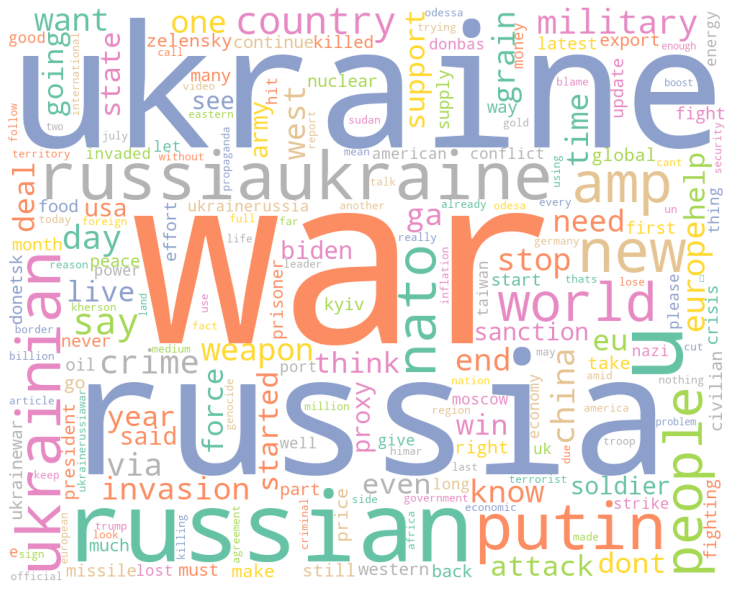

In [329]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in tweet_df.cleaned_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Polarity and Sentiment Analysis

In [330]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [331]:
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [332]:
tweet_df['Subjectivity'] = tweet_df['cleaned_text'].apply(getSubjectivity)
tweet_df['Polarity'] = tweet_df['cleaned_text'].apply(getPolarity)
tweet_df.head()

,id,date,time,tweet,cleaned_text,Subjectivity,Polarity
0,1553781661359292418,2022-07-31,12:36:30,@sturdyAlex #Cov19 $3.7 trillion was lost by w...,cov19 37 trillion lost worker 39 trillion made...,0.500000,0.062500
1,1553781546078900227,2022-07-31,12:36:03,Russia-Ukraine war live: Zelenskiy urges civil...,russiaukraine war live zelenskiy urge civilian...,0.500000,0.136364
2,1553781493717139456,2022-07-31,12:35:50,@andrewhesselden Explain why EU members are ra...,explain eu member rationing gas domestic popul...,0.050000,0.000000
3,1553781221263638528,2022-07-31,12:34:45,@kjay_wonder @LarLar2021 @Letter_to_Jack Ukrai...,wonder tojack ukraine almost u ally suffering ...,0.666667,-0.333333
4,1553781195191771137,2022-07-31,12:34:39,Il regime ucraino organizzava da anni gruppi d...,il regime ucraino organizzava da anni gruppi d...,0.000000,0.000000


In [333]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

tweet_df['Analysis_Polarity'] = tweet_df['Polarity'].apply(get_Polarity_Analysis)

tweet_df['Analysis_Subjectivity'] = tweet_df['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
tweet_df.head()


,id,date,time,tweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,1553781661359292418,2022-07-31,12:36:30,@sturdyAlex #Cov19 $3.7 trillion was lost by w...,cov19 37 trillion lost worker 39 trillion made...,0.500000,0.062500,Positive,Opinion
1,1553781546078900227,2022-07-31,12:36:03,Russia-Ukraine war live: Zelenskiy urges civil...,russiaukraine war live zelenskiy urge civilian...,0.500000,0.136364,Positive,Opinion
2,1553781493717139456,2022-07-31,12:35:50,@andrewhesselden Explain why EU members are ra...,explain eu member rationing gas domestic popul...,0.050000,0.000000,Neutral,Opinion
3,1553781221263638528,2022-07-31,12:34:45,@kjay_wonder @LarLar2021 @Letter_to_Jack Ukrai...,wonder tojack ukraine almost u ally suffering ...,0.666667,-0.333333,Negative,Opinion
4,1553781195191771137,2022-07-31,12:34:39,Il regime ucraino organizzava da anni gruppi d...,il regime ucraino organizzava da anni gruppi d...,0.000000,0.000000,Neutral,Fact


In [334]:
import seaborn as sns

In [335]:
# Show the value counts
tweet_df['Analysis_Polarity'].value_counts()

Positive    17481
Neutral     15289
Negative    13167
Name: Analysis_Polarity, dtype: int64

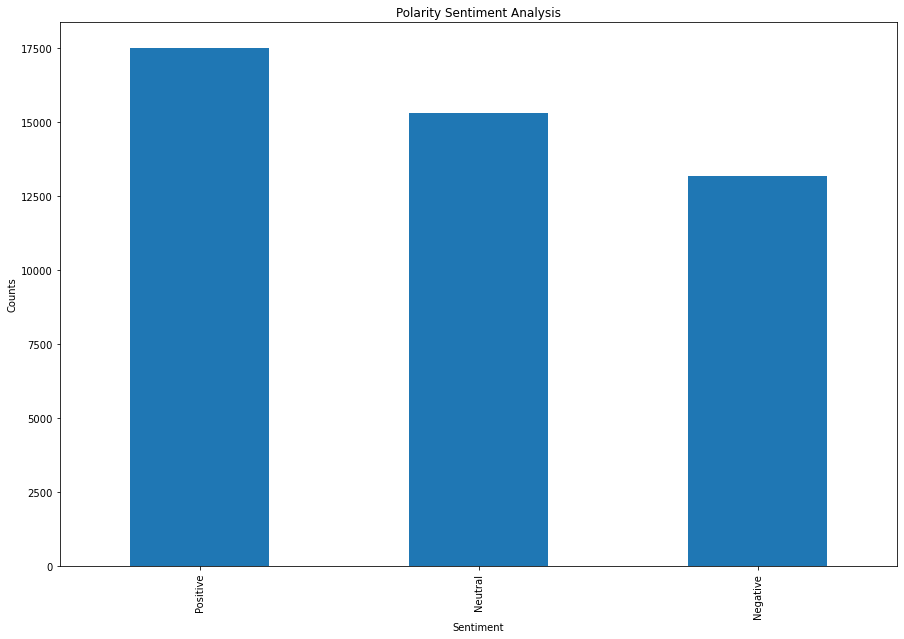

In [336]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweet_df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

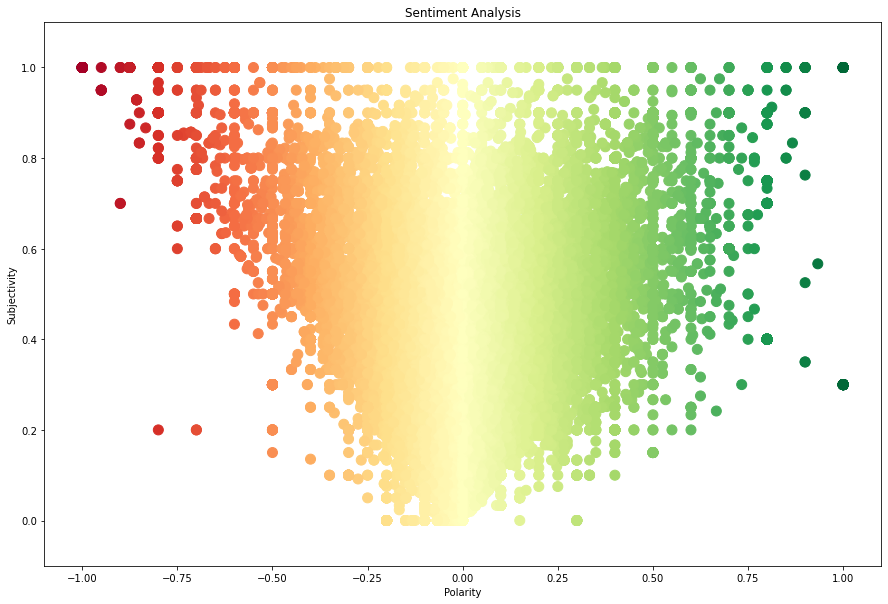

(None,)

In [337]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(tweet_df['Polarity'], tweet_df['Subjectivity'], c=tweet_df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

### Subjective Analysis

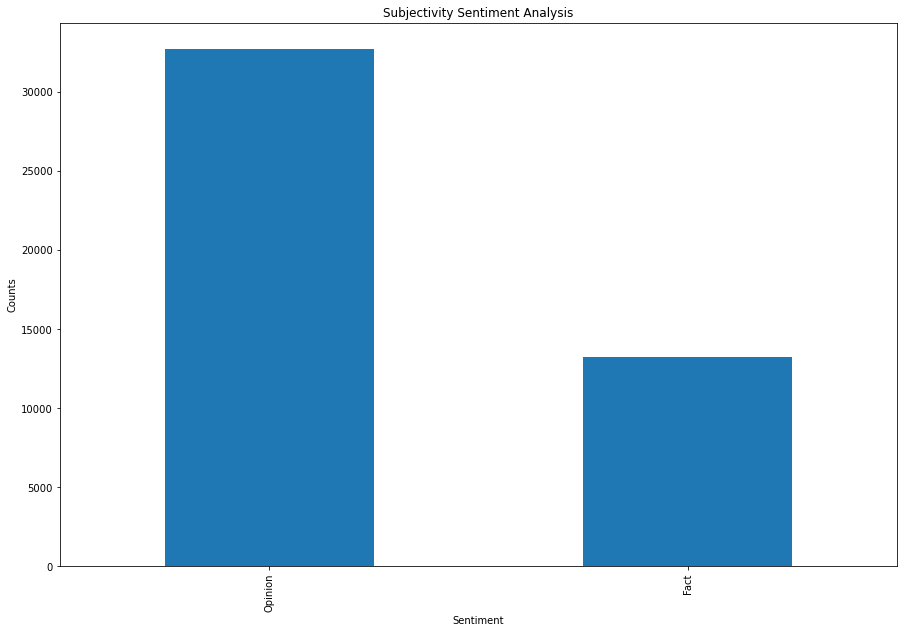

In [338]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweet_df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

We will be classifing tweets as SPAM or NOT and we'll again do Tweet Analysis on Each Category of Tweet. 
* tweet_ham_df
* tweet_spam_df


### Vectorization of Tweet

In [339]:
tfidf_test = X_tfidf_fit.transform(tweet_df['cleaned_text'])


X_test_vect = pd.DataFrame(tfidf_test.toarray())

C:\Users\admin\AppData\Local\Temp\ipykernel_21176\1425294129.py:15: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  emoji.get_emoji_regexp().sub(u'', text)


In [340]:
X_test_vect

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.450238,0.090206,0.134154,0.0,0.098574,0.0,0.047715,0.0,0.051644,0.0,...,0.150349,0.030821,0.096443,0.040362,0.022395,0.000000,0.000000,0.0,0.0,0.0
1,0.416545,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.216776,0.233304,0.060836,0.000000,0.113015,0.136410,0.000000,0.0,0.0,0.0
2,0.420755,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.250900,0.000000,0.028165,0.141447,0.104644,0.000000,0.000000,0.0,0.0,0.0
3,0.479889,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.267084,0.054752,0.128493,0.000000,0.079567,0.000000,0.000000,0.0,0.0,0.0
4,0.469818,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.199222,0.071471,0.027955,0.000000,0.000000,0.125364,0.148672,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45932,0.463525,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.195108,0.055996,0.175216,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
45933,0.416185,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.216589,0.000000,0.121567,0.000000,0.112917,0.000000,0.000000,0.0,0.0,0.0
45934,0.497099,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.191536,0.000000,0.061431,0.154257,0.114121,0.068873,0.000000,0.0,0.0,0.0
45935,0.425126,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.152104,0.109134,0.170745,0.285833,0.079298,0.000000,0.000000,0.0,0.0,0.0


In [341]:
y_test = rf_model.predict(X_test_vect)

In [342]:
tweet_df['label'] = y_test

* Value Counts of SPAM and not SPAM

### Classification of Tweet as SPAM or NOT SPAM

In [345]:
tweet_df['label'].value_counts()

ham     43400
spam     2537
Name: label, dtype: int64

## Phase 2.2: Classified SPAM Tweet Analysis

### List of Tweets classified SPAM

In [346]:
tweet_spam_df = tweet_df[tweet_df['label']=='spam']
#tweet_spam_df.to_csv('tweet_spam.csv')
tweet_spam_df.head()

,id,date,time,tweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,label
0,1553781661359292418,2022-07-31,12:36:30,@sturdyAlex #Cov19 $3.7 trillion was lost by w...,cov19 37 trillion lost worker 39 trillion made...,0.500000,0.062500,Positive,Opinion,spam
14,1553780663312064514,2022-07-31,12:32:32,@joeneckbonehurt @DirtysGhost indeed 57 Republ...,indeed 57 republican 267 republican h rept h r...,0.100000,0.000000,Neutral,Opinion,spam
35,1553778901691801606,2022-07-31,12:25:32,Why should we care about Russian propaganda? B...,care russian propaganda besides obvious impact...,0.133333,-0.033333,Negative,Opinion,spam
122,1553773116723146753,2022-07-31,12:02:33,VIVIDESIGN Group - Russia Has Radically Redef...,vividesign group russia radically redefined te...,1.000000,-0.500000,Negative,Opinion,spam
184,1553769114061066241,2022-07-31,11:46:39,"@FoxNews The democrats, rinos are going to get...",democrat rinos going get u world war war yet p...,0.000000,0.000000,Neutral,Fact,spam


### Word Cloud Analysis

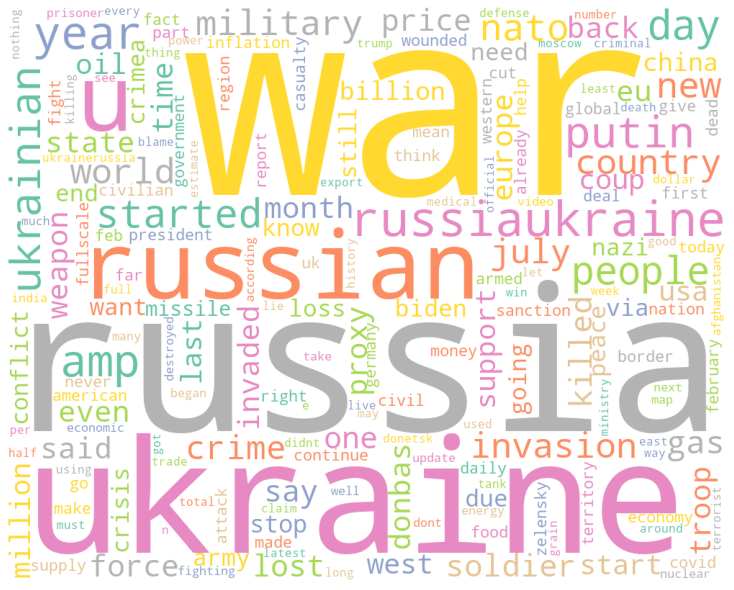

In [347]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in tweet_spam_df.cleaned_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### SPAM CLassified: Polarity and Sentiment Analysis

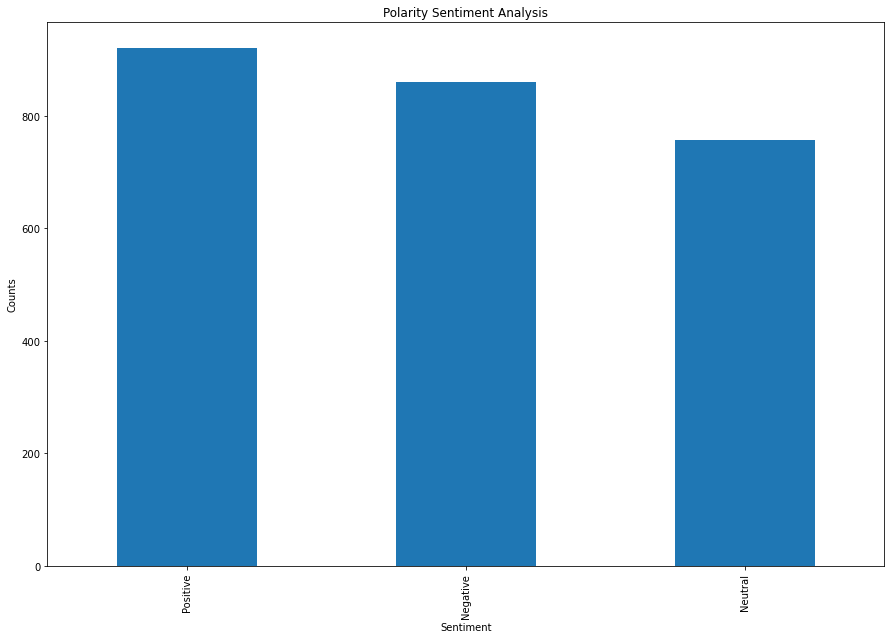

In [348]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweet_spam_df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

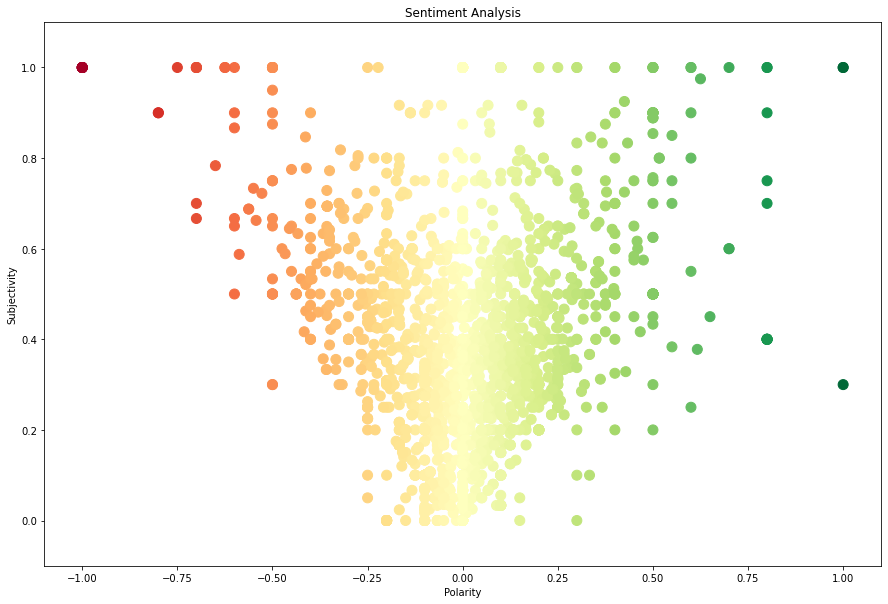

(None,)

In [349]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(tweet_spam_df['Polarity'], tweet_spam_df['Subjectivity'], c=tweet_spam_df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

### SPAM Classified: Subjectivy Analysis

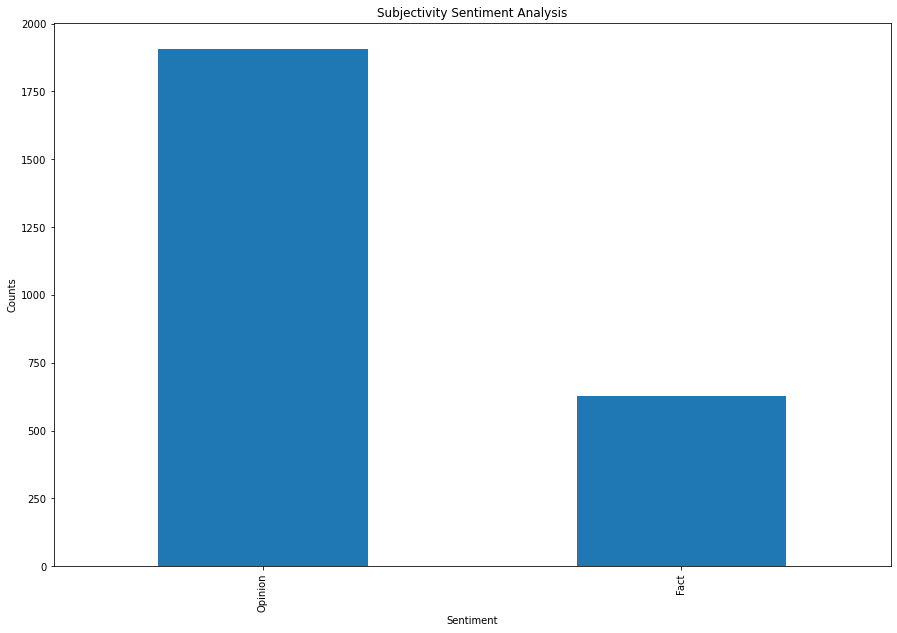

In [350]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweet_spam_df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

## Phase 2.3: Classified NOT SPAM (HAM) Tweet Analysis

In [351]:
tweet_ham_df = tweet_df[tweet_df['label']!='spam']
#tweet_ham_df.to_csv('tweet_not_spam.csv')
tweet_ham_df.head()

,id,date,time,tweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,label
1,1553781546078900227,2022-07-31,12:36:03,Russia-Ukraine war live: Zelenskiy urges civil...,russiaukraine war live zelenskiy urge civilian...,0.500000,0.136364,Positive,Opinion,ham
2,1553781493717139456,2022-07-31,12:35:50,@andrewhesselden Explain why EU members are ra...,explain eu member rationing gas domestic popul...,0.050000,0.000000,Neutral,Opinion,ham
3,1553781221263638528,2022-07-31,12:34:45,@kjay_wonder @LarLar2021 @Letter_to_Jack Ukrai...,wonder tojack ukraine almost u ally suffering ...,0.666667,-0.333333,Negative,Opinion,ham
4,1553781195191771137,2022-07-31,12:34:39,Il regime ucraino organizzava da anni gruppi d...,il regime ucraino organizzava da anni gruppi d...,0.000000,0.000000,Neutral,Fact,ham
5,1553781182357192711,2022-07-31,12:34:36,The war Russia started in Ukraine is an absurd...,war russia started ukraine absurdity based upo...,0.000000,0.000000,Neutral,Fact,ham


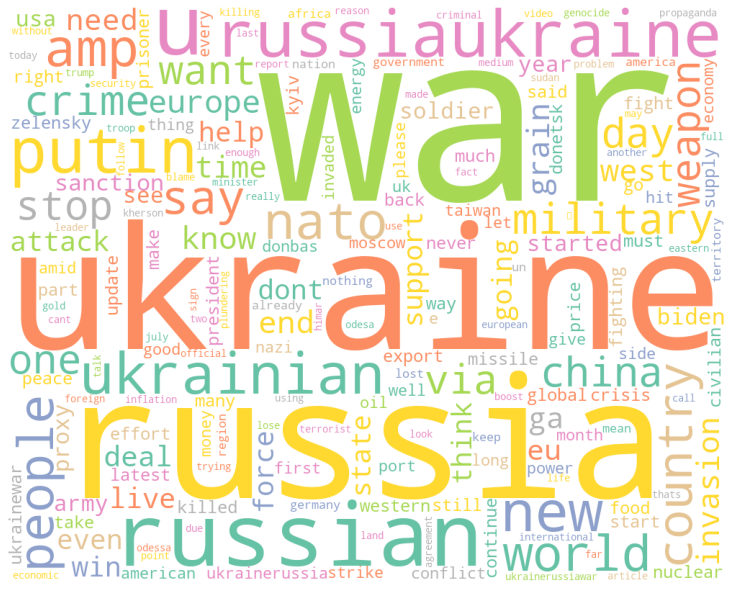

In [352]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in tweet_ham_df.cleaned_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### NOT SPAM CLassified: Polarity and Sentiment Analysis

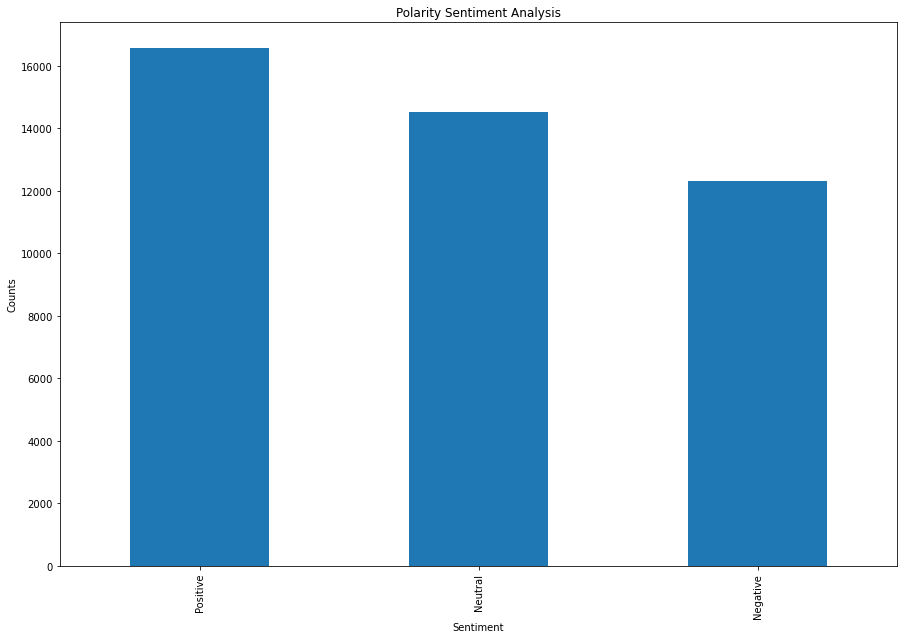

In [353]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweet_ham_df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

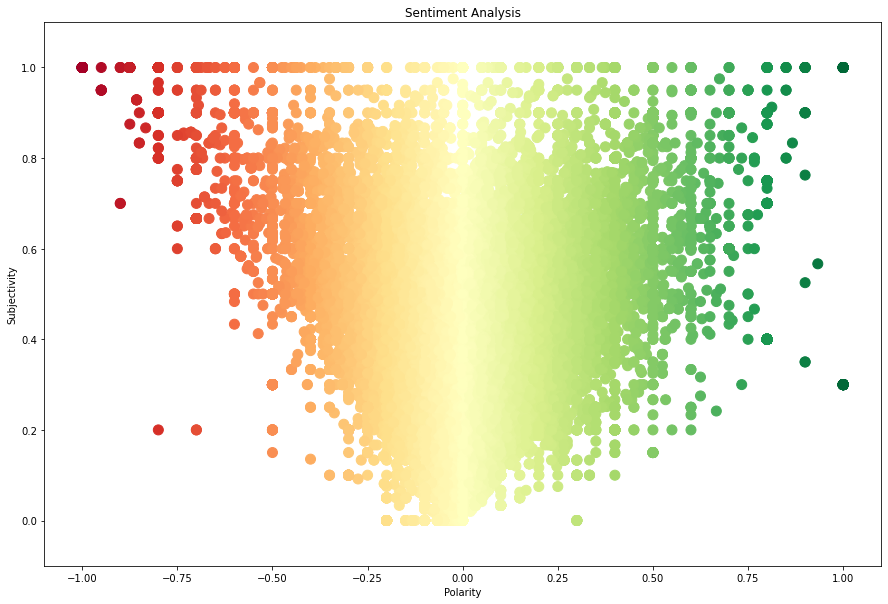

(None,)

In [354]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(tweet_ham_df['Polarity'], tweet_ham_df['Subjectivity'], c=tweet_ham_df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

### NOT SPAM Classified: Subjectivy Analysis

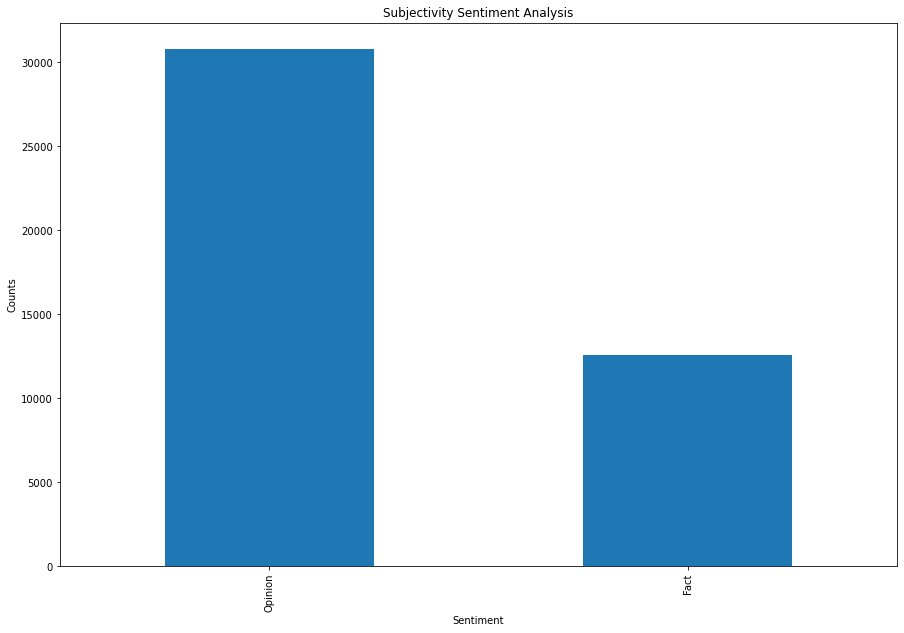

In [355]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweet_ham_df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()